In [154]:
import numpy as np
import matplotlib.pyplot as plt

# There are many different RK schemes depending on how the coefficients of the weighted average are chosen. 
# Here we choose to implement a standard RK4 scheme with a choice of coefficients between classic, 3/8 rule, Ralston

In [155]:
# Define the drift and diffusion functions
def mu(X,t):
    return 0.1*X 
def sigma(X,t):
    return 0.3*X
#Initial condition
X0 = 1.0
#Discretize time
T = 1.0
N = 1000
dt = T/N
t = np.linspace(0,T,N+1)

In [156]:
def get_rk_coefficients(method):
    if method == "classic":
        a = np.array([[0, 0, 0, 0],
                      [0.5, 0, 0, 0],
                      [0, 0.5, 0, 0],
                      [0, 0, 1, 0]])
        b = np.array([1/6, 1/3, 1/3, 1/6])
        c = np.array([0, 0.5, 0.5, 1])
    elif method == "3/8-rule":
        a = np.array([[0, 0, 0, 0],
                      [1/3, 0, 0, 0],
                      [-1/3, 1, 0, 0],
                      [1, -1, 1, 0]])
        b = np.array([1/8, 3/8, 3/8, 1/8])
        c = np.array([0, 1/3, 2/3, 1])
    elif method == "Ralston":
        a = np.array([[0, 0, 0, 0],
                      [0.4, 0, 0, 0],
                      [0.29697761, 0.15875964, 0, 0],
                      [0.21810040, -3.05096516, 3.83286476, 0]])
        b = np.array([0.17476028, -0.55148053, 1.20553560, 0.17118465])
        c = np.array([0, 0.4, 0.45573725, 1])
    else:
        raise ValueError("Unsupported method. Choose between 'classic', '3/8-rule', or 'Ralston'.")
    return a, b, c

In [157]:
#Initalize solutions array
X=np.zeros(N+1)
X[0]=X0

In [158]:
# Initialize random numbers outside the loop
dW1 = np.sqrt(dt) * np.random.normal(size=N)
dW2 = np.sqrt(dt) * np.random.normal(size=N)
dW3 = np.sqrt(dt) * np.random.normal(size=N)
dW4 = np.sqrt(dt) * np.random.normal(size=N)

# Get RK4 coefficients
a, b, c = get_rk_coefficients("classic")



In [159]:
# Implement RK4 scheme
for i in range(1, N+1):
    # Compute stages
    k1 = mu(X[i-1], t[i-1]) * dt + sigma(X[i-1], t[i-1]) * dW1[i-1]
    k2 = mu(X[i-1] + a[1,0] * k1, t[i-1] + c[1] * dt) * dt + sigma(X[i-1] + a[1,0] * k1, t[i-1] + c[1] * dt) * dW2[i-1]
    k3 = mu(X[i-1] + a[2,0] * k1 + a[2,1] * k2, t[i-1] + c[2] * dt) * dt + sigma(X[i-1] + a[2,0] * k1 + a[2,1] * k2, t[i-1] + c[2] * dt) * dW3[i-1]
    k4 = mu(X[i-1] + a[3,0] * k1 + a[3,1] * k2 + a[3,2] * k3, t[i-1] + c[3] * dt) * dt + sigma(X[i-1] + a[3,0] * k1 + a[3,1] * k2 + a[3,2] * k3, t[i-1] + c[3] * dt) * dW4[i-1]

    # Update solution vector
    X[i] = X[i-1] + (b[0] * k1 + b[1] * k2 + b[2] * k3 + b[3] * k4)


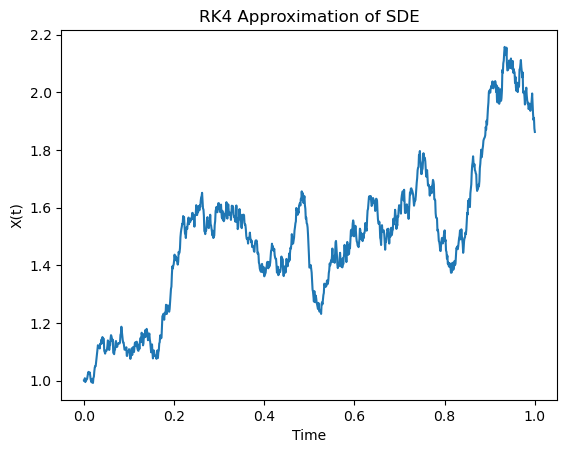

In [160]:
#Plot the results
plt.plot(t,X)
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('RK4 Approximation of SDE')
plt.show()